<a href="https://colab.research.google.com/github/takemetopapa/Febriyan-Fadillah/blob/main/Utspds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Program ini memprediksi harga saham GOOG untuk
#hari tertentu (pilihan) # menggunakan algoritma Machine learning yang disebut #Vector Regression (SVR)
#              

In [ ]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('GOOG1sep.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


In [ ]:
#take 29/09 day
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-09-29,2742.194092,2747.969971,2685.0,2690.419922,2690.419922,1316900


In [ ]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2913.000000,2936.409912,2912.290039,2916.840088,2916.840088,791200
1,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
2,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
3,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
5,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
6,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1644800
7,2021-09-13,2864.020020,2883.820068,2845.649902,2869.300049,2869.300049,1008800
8,2021-09-14,2883.219971,2894.550049,2858.110107,2868.120117,2868.120117,945800
9,2021-09-15,2875.179932,2911.629883,2845.120117,2904.120117,2904.120117,1032400


In [ ]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [ ]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
#Create the independent data set
for day in df_days:
   days.append([int(str((day.split('-')[2]).replace('0','')))])

#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [ ]:
print(days)

[[1], [2], [3], [7], [8], [9], [1], [13], [14], [15], [16], [17], [2], [21], [22], [23], [24], [27], [28]]


In [ ]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

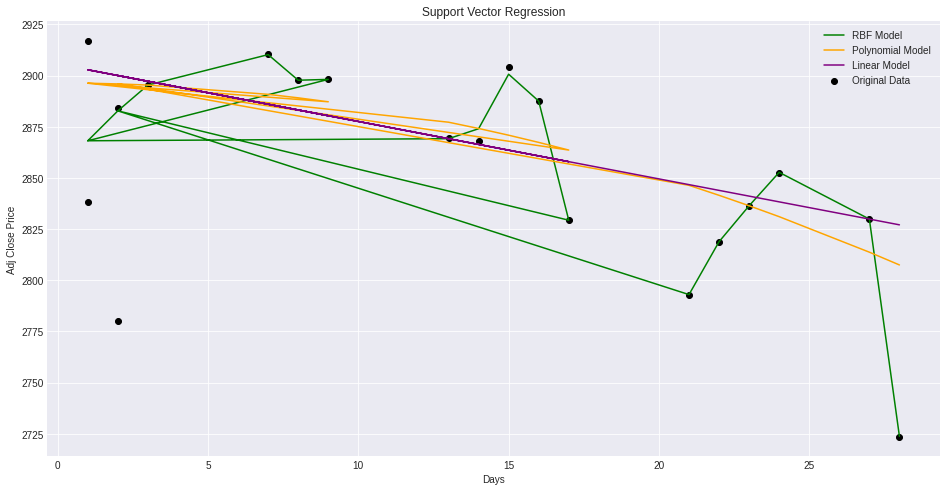

In [ ]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2692.62407997]
The Linear SVR predicted: [2821.50287093]
The Polynomial SVR predicted: [2794.36362954]
